# Note: python version used = 3.11.9

In [44]:
!pip install faker numpy pandas

# Part 1: Creation of data

## Import the Libraries 

In [80]:
import numpy as np
import pandas as pd
import faker # main
import random

In [81]:
fake = faker.Faker()
N_rows = 1000
output_file = "sinthetic_bodyfat_data.csv"

## Functions

In [82]:
def calculate_bmi (weight,height_cm):
    height_m = height_cm/100
    return weight/height_m

def generate_bodyfat_data (gender, bmi, waist, neck_cm):
    if gender == 1: # Male
        bf = (
            0.25 * bmi + 0.35 * (waist / 100) * 100 - 0.20 * (neck_cm / 100) + np.random.normal(0, 1.5)
        )
        return np.clip(bf,8,35)
    else : # Female
        bf = (
            0.30 * bmi + 0.40 * (waist / 100) * 100 - 0.15 * (neck_cm / 100) * 100 + np.random.normal(0, 2.0)
            )
        return np.clip(bf, 18, 45)

## Data Generation

In [90]:
for i in range(N_rows):
    age = random.randint(18, 40)
    gender = random.choice([0, 1]) # 0 = Female, 1 = Male
    if gender == 1:
        height_cm = random.randint(160, 185)
        neck_cm = random.uniform(34, 42)
    else:
        height_cm = random.randint(150, 175)
        neck_cm = random.uniform(30, 38)
    bmi = random.uniform(18, 32)
    weight_kg = bmi * (height_cm / 100) ** 2
    weight_kg += random.uniform(-2, 2)
    waist_cm = random.uniform(0.45, 0.60) * height_cm
    waist_cm += random.uniform(-2, 2)
    body_fat = generate_bodyfat_data(
        gender,
        calculate_bmi(weight_kg, height_cm),
        waist_cm,
        neck_cm
        )
    data = []
    data.append([
        age,
        gender,
        round(height_cm, 1),
        round(weight_kg, 1),
        round(waist_cm, 1),
        round(neck_cm, 1),
        round(body_fat, 1)
        ])

## Create DataFrame & Export

In [ ]:
columns = [
"age",
"gender",
"height_cm",
"weight_kg",
"waist_cm",
"neck_cm",
"body_fat_percent"
]


df = pd.DataFrame(data, columns=columns)
df.to_csv(output_file, index=False)


print(f" Synthetic dataset generated: {output_file}")
print(df.head())


 Synthetic dataset generated: sinthetic_bodyfat_data.csv
   age  gender  height_cm  weight_kg  waist_cm  neck_cm  body_fat_percent
0   28       0        150       64.8      76.6     34.5              40.0
1   36       1        162       53.3      84.1     37.5              35.0
2   22       1        172       53.8      81.0     41.2              31.6
3   30       1        160       60.5      91.4     36.7              35.0
4   34       0        165       70.1      84.4     35.8              42.0


In [92]:
print(df.tail())

      age  gender  height_cm  weight_kg  waist_cm  neck_cm  body_fat_percent
1996   32       1        179       65.7     103.2     37.9              35.0
1997   32       0        161       79.1      93.7     31.0              45.0
1998   26       0        170       57.2      97.8     31.7              43.2
1999   32       0        152       64.0      76.7     33.9              36.2
2000   20       1        172       71.8      96.2     39.3              35.0


# Part 2: EDA

In [85]:
import pandas as pd
df = pd.read_csv("sinthetic_bodyfat_data.csv")
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               2001 non-null   int64  
 1   gender            2001 non-null   int64  
 2   height_cm         2001 non-null   int64  
 3   weight_kg         2001 non-null   float64
 4   waist_cm          2001 non-null   float64
 5   neck_cm           2001 non-null   float64
 6   body_fat_percent  2001 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 109.6 KB


,age,gender,height_cm,weight_kg,waist_cm,neck_cm,body_fat_percent
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,28.820590,0.477761,167.283358,69.786707,87.666367,35.972714,37.916692
std,6.698156,0.499630,9.045450,13.613049,8.641281,3.018423,3.892510
min,18.000000,0.000000,150.000000,40.700000,67.600000,30.000000,25.200000
25%,23.000000,0.000000,161.000000,59.400000,81.300000,34.000000,35.000000
50%,29.000000,0.000000,167.000000,68.700000,87.500000,35.900000,35.000000
75%,35.000000,1.000000,174.000000,79.800000,94.100000,37.900000,41.400000
max,40.000000,1.000000,185.000000,107.400000,112.200000,42.000000,45.000000


## Graph plotting

In [86]:
!pip install matplotlib

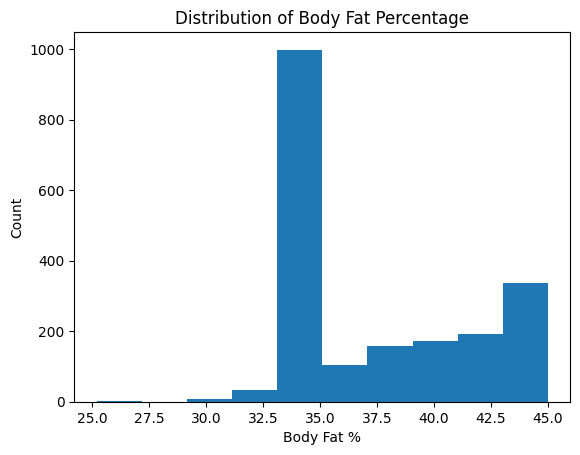

In [96]:
import matplotlib.pyplot as plt

plt.hist(df["body_fat_percent"])
plt.xlabel("Body Fat %")
plt.ylabel("Count")
plt.title("Distribution of Body Fat Percentage")
plt.show()